<a href="https://colab.research.google.com/github/NaveenCoderg/HR-Analytics/blob/main/Hotel_Reservation_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**


The primary focus of this report revolves around the analysis of hotel booking cancellations, particularly the alarming increase in cancellation rates observed in both the City Hotel and Resort Hotel in recent years. These elevated cancellation rates have led to various challenges for both establishments, including decreased revenue and underutilization of hotel rooms. Consequently, the primary objective for both hotels is to mitigate these cancellation rates, thereby enhancing revenue generation efficiency. The report also encompasses an examination of other factors unrelated to their business operations and annual revenue generation.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading The Dataset**

In [ ]:
df = pd.read_csv('/content/hotel_booking.csv')

**Exploratory Data Analysis and Data Cleaning**

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
9860,Resort Hotel,1,108,2017,January,2,14,2,1,2,...,Transient,55.80,0,2,Canceled,2016-09-30,Debbie Phillips,DebbiePhillips@verizon.com,344-171-6143,************1037
9861,Resort Hotel,1,87,2017,January,2,14,2,1,1,...,Transient,46.43,0,0,Canceled,2016-10-19,Brittney Freeman DDS,Brittney_DDS@comcast.net,367-944-6432,************7888
9862,Resort Hotel,1,275,2017,January,2,14,2,1,2,...,Transient,51.30,0,2,Canceled,2016-09-28,Elizabeth Griffith,Elizabeth_G67@protonmail.com,369-080-5539,************8671
9863,Resort Hotel,1,87,2017,January,2,14,2,1,2,...,Transient,33.60,0,0,Canceled,2016-10-19,Cheryl Dean,Cheryl_Dean79@xfinity.com,280-252-5660,************7647
9864,Resort Hotel,1,106,2017,January,2,14,2,1,2,...,Transient,55.80,0,2,Canceled,2016-11-27,Brittany Edwards,Brittany_E@att.com,645-999-5013,***


In [ ]:
df.shape

(9865, 36)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9865 entries, 0 to 9864
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           9865 non-null   object 
 1   is_canceled                     9865 non-null   int64  
 2   lead_time                       9865 non-null   int64  
 3   arrival_date_year               9865 non-null   int64  
 4   arrival_date_month              9865 non-null   object 
 5   arrival_date_week_number        9865 non-null   int64  
 6   arrival_date_day_of_month       9865 non-null   int64  
 7   stays_in_weekend_nights         9865 non-null   int64  
 8   stays_in_week_nights            9865 non-null   int64  
 9   adults                          9865 non-null   int64  
 10  children                        9865 non-null   float64
 11  babies                          9865 non-null   int64  
 12  meal                            98

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9865 entries, 0 to 9864
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           9865 non-null   object        
 1   is_canceled                     9865 non-null   int64         
 2   lead_time                       9865 non-null   int64         
 3   arrival_date_year               9865 non-null   int64         
 4   arrival_date_month              9865 non-null   object        
 5   arrival_date_week_number        9865 non-null   int64         
 6   arrival_date_day_of_month       9865 non-null   int64         
 7   stays_in_weekend_nights         9865 non-null   int64         
 8   stays_in_week_nights            9865 non-null   int64         
 9   adults                          9865 non-null   int64         
 10  children                        9865 non-null   float64       
 11  babi

In [ ]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,9865,9865,9865,9857,9865,9865,9865,9865,9865,9865,9865,9865,9865,9865,9865
unique,1,12,5,73,6,3,9,10,3,4,3,9322,9843,9865,5976
top,Resort Hotel,October,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled,David Smith,Cynthia_S@xfinity.com,669-792-1661,************5289
freq,9865,1443,7027,5865,4637,7658,5996,5078,8798,7352,6045,5,2,1,7


In [ ]:
for col in df.describe(include = 'object').columns:
  print(col)
  print(df[col].unique())
  print('-'*50)

hotel
['Resort Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA']
--------------------------------------------------
market_segment
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups']
--------------------------------------------------
dis

In [ ]:
df.isnull().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              8
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                             1494
company                           9320
days_in_waiting_list     

In [ ]:
df.drop(['company','agent'],axis=1,inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000,9857.0,9857.0,9857.0,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000,9857
mean,0.628284,115.629400,2015.630009,31.590443,15.811099,1.281932,3.378919,1.945014,0.130466,0.014913,0.0,0.0,0.0,0.235873,1.458456,93.909119,0.056914,0.512123,2016-02-09 21:38:35.146596352
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2014-11-18 00:00:00
25%,0.000000,38.000000,2015.000000,22.000000,8.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,55.000000,0.000000,0.000000,2015-10-08 00:00:00
50%,1.000000,92.000000,2016.000000,33.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,79.000000,0.000000,0.000000,2016-02-09 00:00:00
75%,1.000000,170.000000,2016.000000,42.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,120.600000,0.000000,1.000000,2016-06-06 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,2.000000,0.0,0.0,0.0,17.000000,150.000000,384.000000,2.000000,4.000000,2017-01-12 00:00:00
std,0.483287,97.214564,0.501382,12.691135,8.951202,1.152334,2.416162,1.147069,0.460517,0.123698,0.0,0.0,0.0,0.669260,12.362881,55.060519,0.233435,0.778985,NaN


<Axes: >

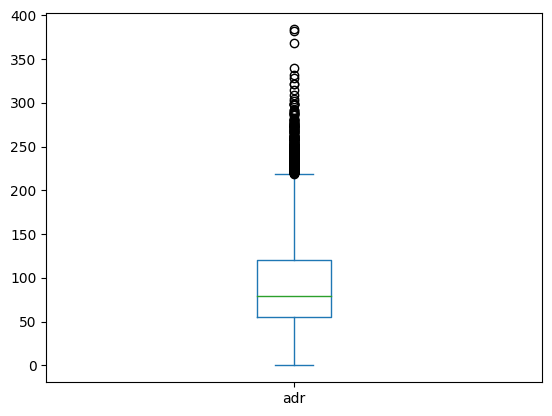

In [ ]:
df['adr'].plot(kind='box')

In [ ]:
df = df[df['adr']<5000]

**Data Analysis and Visualizations**

In [ ]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
cancelled_perc

is_canceled
1    0.628284
0    0.371716
Name: proportion, dtype: float64

is_canceled
1    0.628284
0    0.371716
Name: proportion, dtype: float64


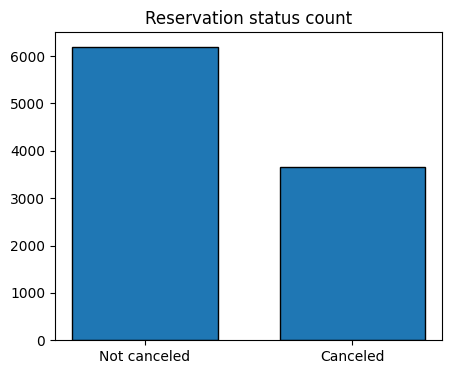

In [ ]:
print(cancelled_perc)
plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(),edgecolor='k',width=0.7)
plt.show()

Text(0.5, 1.0, 'kk')

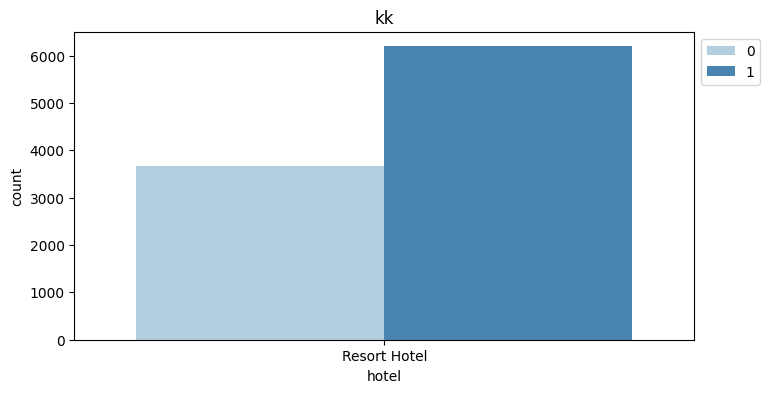

In [ ]:
plt.figure(figsize=(8,4))
ax1 = sns.countplot(x='hotel',hue = 'is_canceled',data=df,palette='Blues')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('kk')

In [ ]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
1    0.628284
0    0.371716
Name: proportion, dtype: float64

In [ ]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

Series([], Name: proportion, dtype: float64)

In [ ]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()

In [ ]:
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

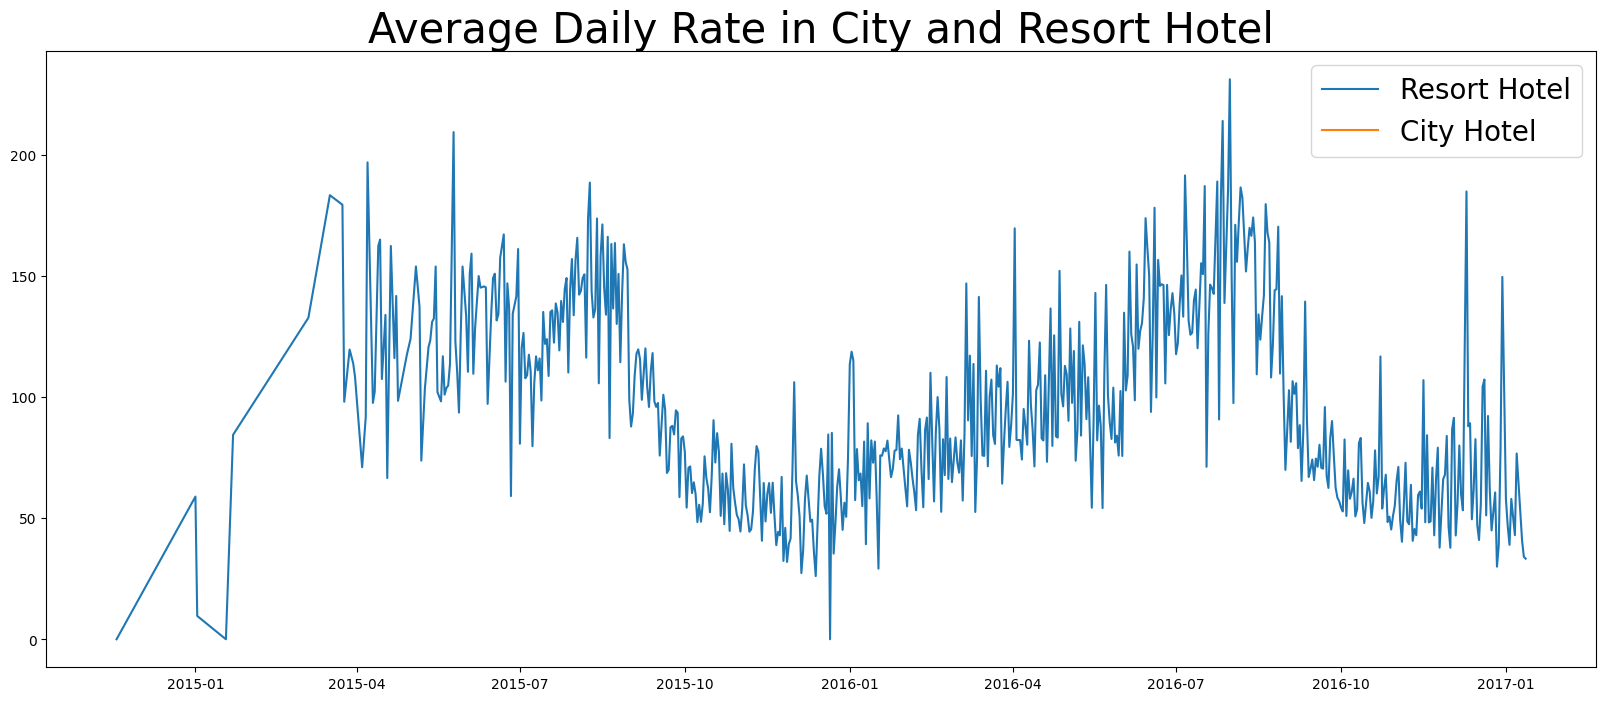

In [ ]:
plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City and Resort Hotel',fontsize = 30)
plt.plot(resort_hotel.index,resort_hotel['adr'], label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label = 'City Hotel')
plt.legend(fontsize=20)
plt.show()

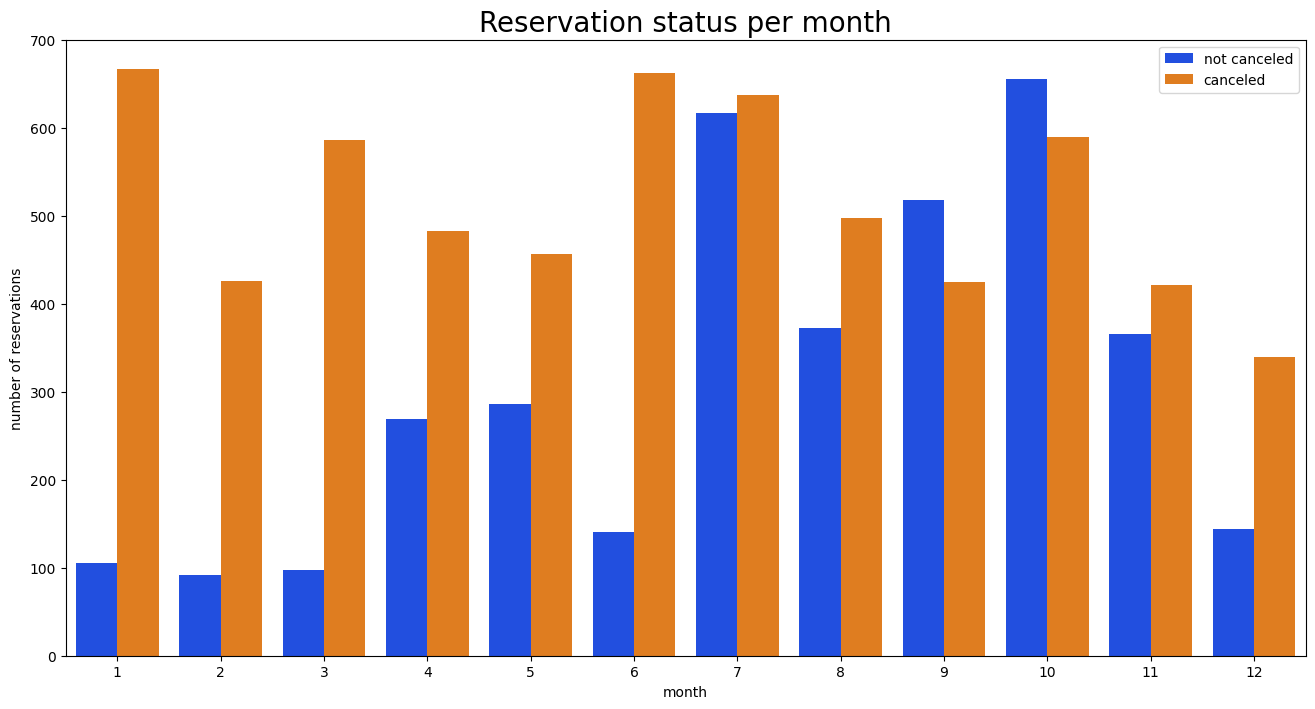

In [ ]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x='month',hue='is_canceled',data=df,palette='bright')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month',size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

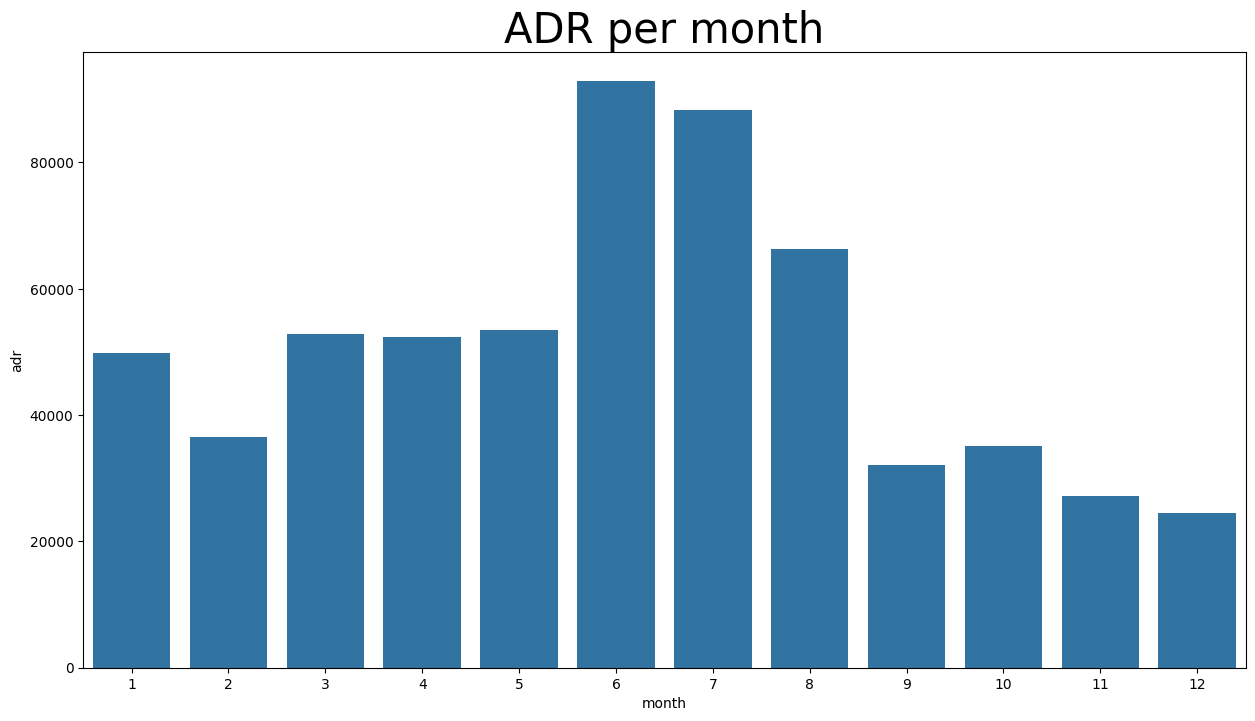

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
plt.title('ADR per month', fontsize=30)
sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')['adr'].sum().reset_index())
plt.show()


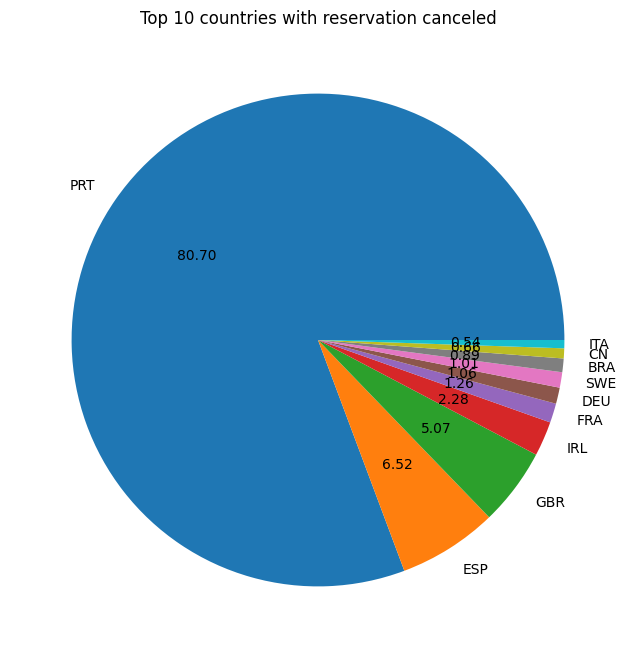

In [ ]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country,autopct = '%.2f',labels = top_10_country.index)
plt.show()

In [ ]:
 df['market_segment'].value_counts()

market_segment
Online TA        4637
Groups           2366
Offline TA/TO    1551
Direct            953
Corporate         324
Complementary      26
Name: count, dtype: int64

In [ ]:
df['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.470427
Groups           0.240032
Offline TA/TO    0.157350
Direct           0.096683
Corporate        0.032870
Complementary    0.002638
Name: proportion, dtype: float64

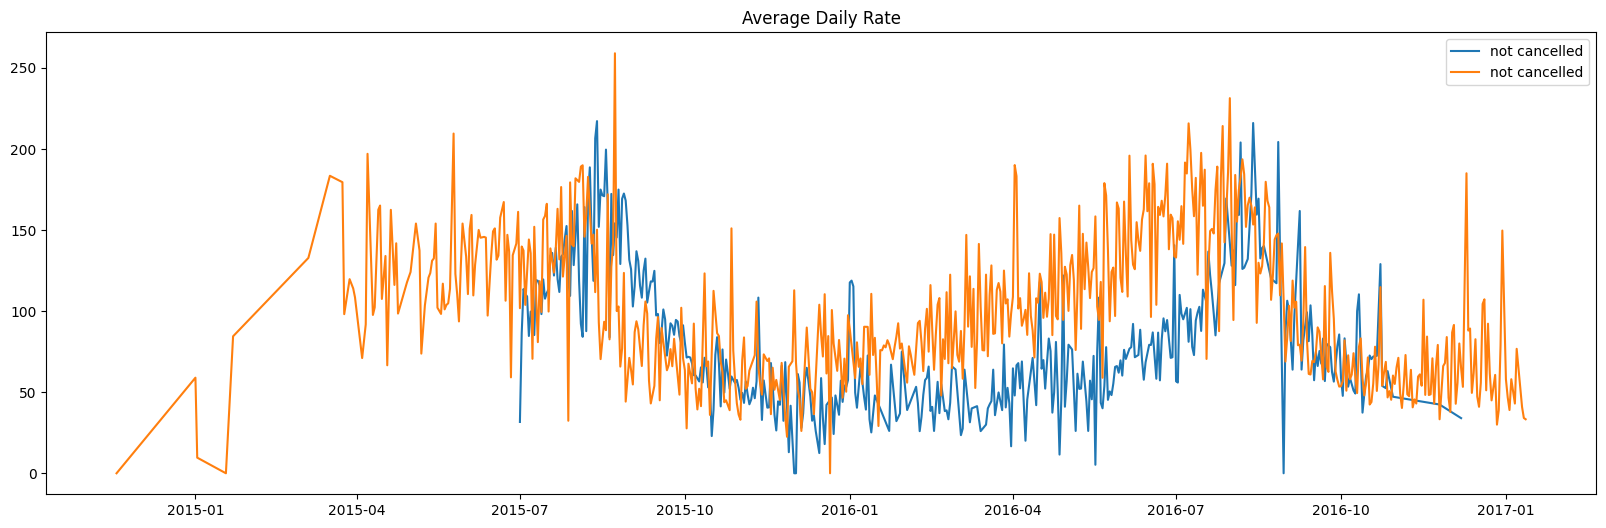

In [ ]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date',inplace = True)

not_cancelled_data = df[df['is_canceled']==0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)

plt.figure(figsize = (20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'],label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label = 'not cancelled')
plt.legend()

In [ ]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016')&(cancelled_df_adr['reservation_status_date']<'2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016')&(not_cancelled_df_adr['reservation_status_date']<'2017-09')]

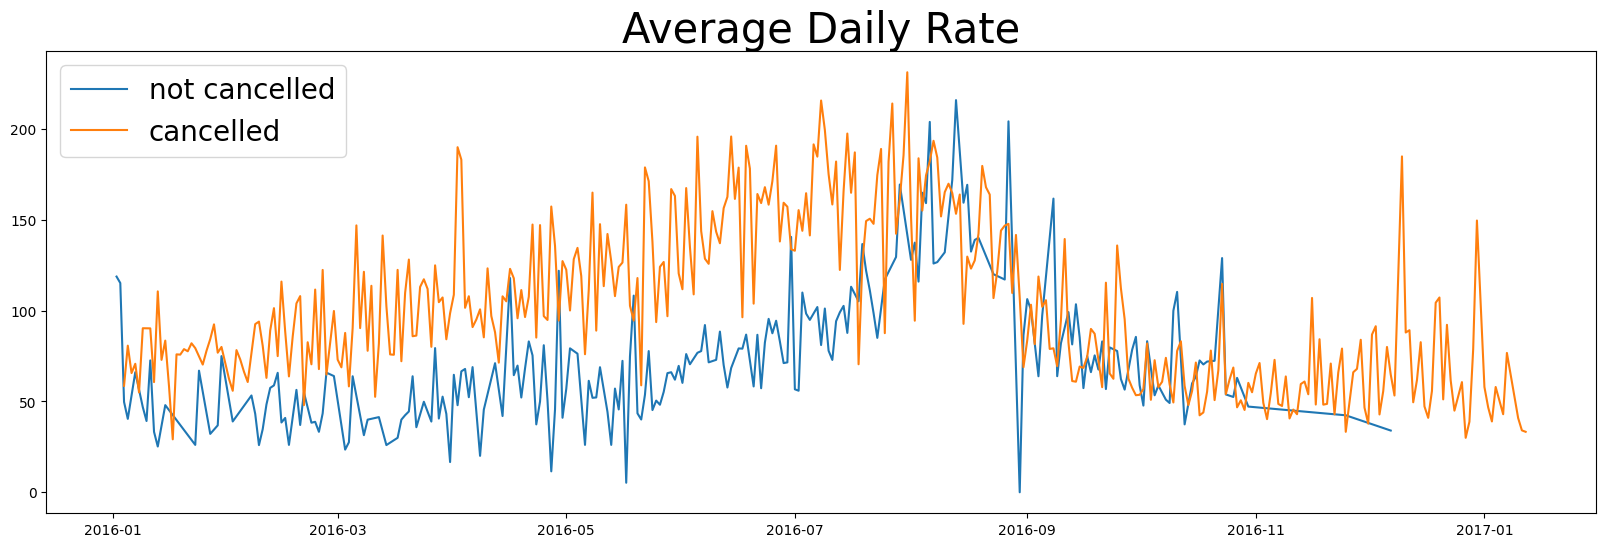

In [ ]:
plt.figure(figsize = (20,6))
plt.title('Average Daily Rate',fontsize=30)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'],label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label = 'cancelled')
plt.legend(fontsize = 20)